In [1]:
import simcado as sim

c:\program files\anaconda3\lib\site-packages\pysynphot\locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
c:\program files\anaconda3\lib\site-packages\pysynphot\locations.py:329: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
c:\program files\anaconda3\lib\site-packages\pysynphot\refs.py:118: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for ftp://ftp.stsci.edu/cdbs\mtab\*_tmg.fits
  'functionality will be SEVERELY crippled. ' + str(e))
c:\program files\anaconda3\lib\site-packages\pysynphot\refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for ftp://ftp.stsci.edu/cdbs\mtab\*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))


In [2]:
cmd = sim.UserCommands("metis_image_NQ.config")
cmd["OBS_EXPTIME"]=1
cmd["ATMO_USE_ATMO_BG"] = "yes"
cmd["SCOPE_USE_MIRROR_BG"] = "yes"
cmd["SCOPE_PSF_FILE"] = "PSFs/PSF_4.0_microns.fits"

In [3]:
opt = sim.OpticalTrain(cmd)

In [4]:
fpa = sim.Detector(cmd, small_fov=False)

In [5]:
mag = np.array([12, 12])

lam, spec = sim.source.flat_spectrum(0, "L")
src = sim.Source(lam=lam, spectra=np.array([spec]), 
                 ref=[0,0], weight=10**(-0.4*mag), 
                 x=[0,0.07], y=[0,0.07])

In [10]:
src.apply_optical_train(opt, fpa)
hdu = fpa.read_out(OBS_EXPTIME=1)

Generating image for chip 1
Reading out chip 1 using superfast
4.65765791573e+12 1110468.11592 1458615.25335 1110468.11592
4.65765e+12 1.10527e+06 1.45863e+06 1.11047e+06


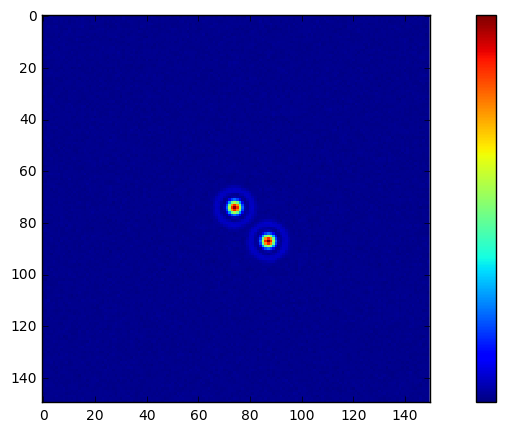

In [11]:
plt.figure(figsize=(12,5))
plt.imshow(hdu[0].data[950:1100,950:1100], norm=LogNorm(), interpolation="none")
plt.colorbar()

In [12]:
cmd["INST_FILTER_TC"]

'filter_curves/NACO-Lprime.dat'

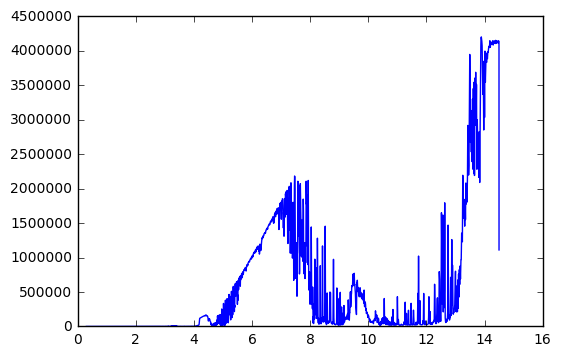

In [12]:
plt.plot(opt.ec_atmo.lam, opt.ec_atmo)

In [53]:
(2*4*u.um/40/u.m)

<Quantity 0.2 um / m>

In [48]:
#sim.psf.utils.add_keyword("PSF_4.0_microns.fits", "WAVELENG", 4)
sim.psf.utils.add_keyword("PSFs/PSF_4.0_microns.fits", "PIXSCALE", 0.00525)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  427                                                  
NAXIS2  =                  427                                                  
EXTEND  =                    T                                                  
WAVE0   =                  4.0 / micrometers                                    
PIXSCALE=              0.00525 / arcseconds                                     
FOV     =                 53.0 / arcseconds                                     

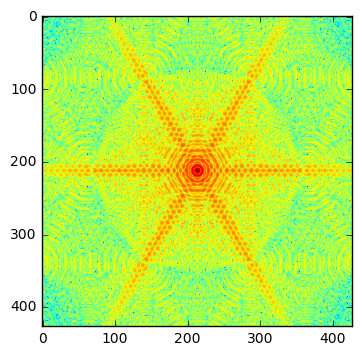

In [49]:
a = fits.open("PSFs/PSF_4.0_microns.fits")
plt.imshow(a[0].data, norm=LogNorm())
a[0].header

In [127]:
import astropy
astropy.__version__

'1.3.2'

In [ ]:
sim.source.source_from_image()

In [54]:
sim.utils.telescope_diffraction_limit(39, 4)

0.02115536474329193

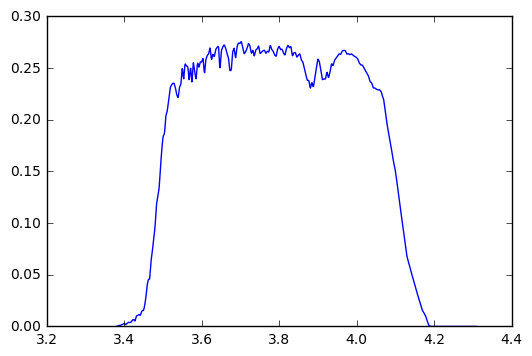

In [5]:
plt.plot(opt.tc_source.lam, opt.tc_source.val)

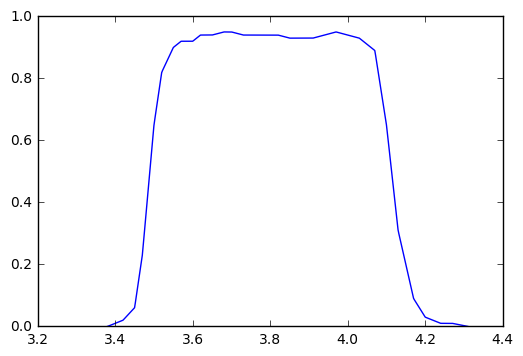

In [152]:
tc = opt.cmds["INST_FILTER_TC"]
plt.plot(tc.lam, tc.val)

In [34]:
ascii.read(opt.cmds["SCOPE_MIRROR_LIST"])

Mirror,Outer,Inner,Temp,Coating
str2,float64,float64,float64,str23
M1,37.3,11.1,0.0,TC_mirror_mgf2agal.dat
M2,4.2,0.545,0.0,TC_mirror_mgf2agal.dat
M3,3.8,0.14,0.0,TC_mirror_mgf2agal.dat
M4,2.4,0.0,0.0,TC_mirror_aluminium.dat
M5,2.4,0.0,0.0,TC_mirror_mgf2agal.dat
M6,1.1,0.0,0.0,TC_mirror_mgf2agal.dat


In [ ]:
plt.plot(opt.cmds["SCOPE_M1_TC"].lam, opt.cmds["SCOPE_M1_TC"].val)

In [41]:
cmd["INST_MIRROR_AO_TC"]

'c:\\program files\\anaconda3\\lib\\site-packages\\simcado\\data\\TC_mirror_gold.dat'

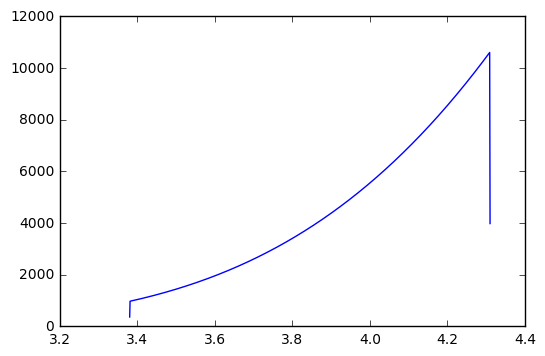

In [36]:
plt.plot(opt.ec_mirror.lam, opt.ec_mirror.val)

In [108]:
opt.n_ph_bg

0.0

# Other stuff

In [90]:
a = ascii.read(sim.__data_dir__+"/vega_full.dat")

In [93]:
xo = a["Wavelength"]
yo = a["Flux"]
#xf = np.logspace(np.log10(0.3), np.log10(20), 1000)
xf = np.linspace(0.3, 20, 1000)
yf = np.interp(xf, xo, yo)
#yf = yf * np.sum(yo)/np.sum(yf)

In [94]:
np.sum(yo)/np.sum(yf)

406.93987888527926

In [95]:
sim.spectral.EmissionCurve(lam=xf, val=yf)

EmissionCurve 
[ 4490.23637399  9044.78857602  9125.18336106 ... 69.49059621  69.4858421   17.37062856]

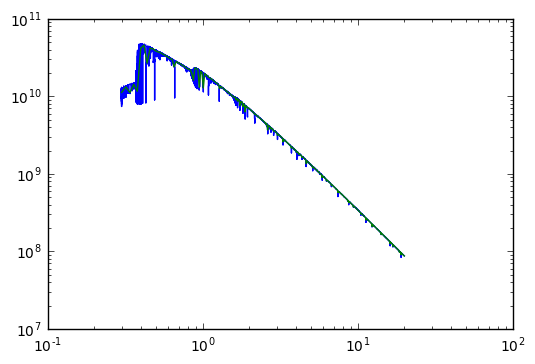

In [96]:
plt.loglog(xo, yo)
plt.loglog(xf, yf)


In [41]:
np.savetxt("vega_red.dat", np.array([xf,yf]).T, fmt="%.3e")

In [45]:
a[a.colnames[1]]

748300000000.0
963900000000.0
971100000000.0
978400000000.0
985800000000.0
993100000000.0
1.001e+12
1.008e+12
1.133e+12
1.132e+12
1.131e+12


In [1]:
import simcado as sim

c:\program files\anaconda3\lib\site-packages\pysynphot\locations.py:46: UserWarning: PYSYN_CDBS is undefined; functionality will be SEVERELY crippled.
  warnings.warn("PYSYN_CDBS is undefined; functionality will be SEVERELY "
c:\program files\anaconda3\lib\site-packages\pysynphot\locations.py:329: UserWarning: Extinction files not found in extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
c:\program files\anaconda3\lib\site-packages\pysynphot\refs.py:118: UserWarning: No graph or component tables found; functionality will be SEVERELY crippled. No files found for ftp://ftp.stsci.edu/cdbs\mtab\*_tmg.fits
  'functionality will be SEVERELY crippled. ' + str(e))
c:\program files\anaconda3\lib\site-packages\pysynphot\refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for ftp://ftp.stsci.edu/cdbs\mtab\*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))


In [2]:
sim.source.zero_magnitude_photon_flux("V")

31663319995.230003

In [8]:
995.5   #photons cm-2 s-1 A-1   # 0.085 um
193.5 * 2600 * 1E4 / 1E12

0.005031

In [10]:
#1 Jy = 1.51e7 photons sec^-1 m^-2 (dlambda/lambda)^-1
3640 * 1.51e7 * (550/85)

355649411764.7059

In [31]:
115785004490000.0 / 355649411764.7059

325.55938702522644

In [45]:
sim.source.zero_magnitude_photon_flux("B") / (4260 * 1.51e7 * 1/0.19)

0.0094240258493455218

In [46]:
sim.source.zero_magnitude_photon_flux("V") / (3640 * 1.51e7 * 1/0.16)# * 10**(-0.4*-1.46)

0.092812926807364818

In [47]:
sim.source.zero_magnitude_photon_flux("R") / (3080 * 1.51e7 * 1/0.18)

0.16415809917708779

In [48]:
sim.source.zero_magnitude_photon_flux("I") / (2550 * 1.51e7 * 1/0.19)

0.12517549324165694

In [49]:
sim.source.zero_magnitude_photon_flux("J") / (1600 * 1.51e7 * 1/0.21)

0.087094411489270468

In [50]:
sim.source.zero_magnitude_photon_flux("H") / (1080 * 1.51e7 * 1/0.19)

0.12412584547280849

In [57]:
sim.source.zero_magnitude_photon_flux("K") / (670 * 1.51e7 * 1/0.23)  

0.12888542424501209

In [54]:
10**(-0.4*-1.35)

3.4673685045253166

In [13]:
#6e8 ph/s/m2
150/810

10**(-0.4*-1.46)

3.8370724549227875

In [58]:
import pysynphot as psp

In [59]:
vega = psp.Vega

In [104]:
w = np.array([5000, 5050, 5900, 5950])  # Angstroms
t = np.array([0, 1, 1, 0])
bp = psp.ArrayBandpass(w, t, name='MyBandpass')

In [123]:
obs = psp.Observation(vega, bp)

(MyBandpass) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


In [109]:
obs.countrate("counts")

40548323169.275856

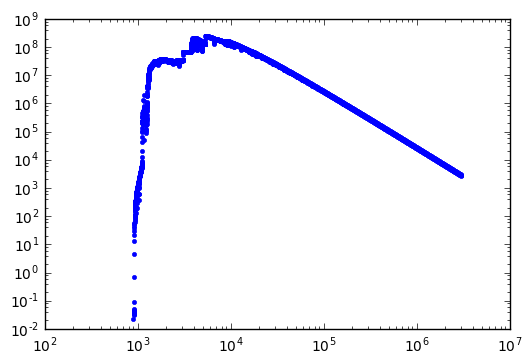

In [121]:
plt.loglog(vega.wave, vega.flux, ".")

In [6]:
vega.convert("counts")

In [7]:
np.savetxt("vega_pysynphot.dat", np.array([vega.wave/1E4, vega.flux]).T, fmt="%.3e")

In [90]:
v = sim.optics.get_filter_curve("V")

In [91]:
vfilt = psp.ArrayBandpass(v.lam*1E4, v.val, name='V-filter')

In [102]:
obs = psp.Observation(vega, vfilt)
obs.countrate("counts") / 1E9

(V-filter) does not have a defined binset in the wavecat table. The waveset of the spectrum will be used instead.


(39.89422429575194, 'x1E9')

In [107]:
995.5 * 1E4

9955000.0

In [94]:
(10**(-0.4*1.46) * obs.countrate("counts")) / 1E9

10.397047427282612

In [97]:
(3640 * 1.51e7 * 1/0.16) / obs.countrate("counts")

8.61089558862734

In [98]:
print(obs.countrate("counts"))
print( (3640 * 1.51e7 * 1/0.16) )

39894224295.75194
343525000000.0


In [82]:
34/7.21

4.715672676837725

In [83]:
10**(1.35/2.5)

3.4673685045253166

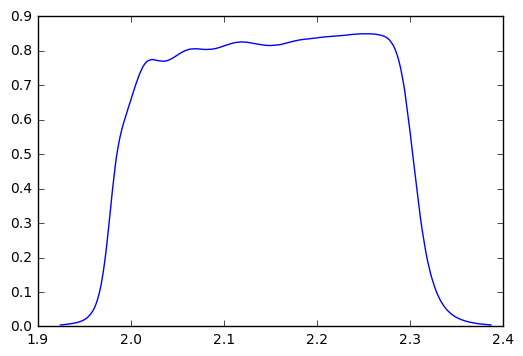

In [84]:
plt.plot(v.lam,v.val)

In [ ]:
sim.utils.add_keyword()